<a href="https://colab.research.google.com/github/HardProxy/data-visualization/blob/main/COVID-19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baixando os dados do Brasil.IO 
 

In [ ]:
# Importação de Módulos necessários para análise
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import Request, urlopen
import io
import gzip

In [ ]:
url = "https://data.brasil.io/dataset/covid19/caso_full.csv.gz"

request = Request(url, headers={"User-Agent": "python-urllib"})
response = urlopen(request)
data = gzip.decompress(response.read()).decode("utf-8")
df = pd.read_csv(io.StringIO(data))

# 1) Análise de Casos


## Estado do Amazonas


In [ ]:
estado = 'AM'
estado_df = df[df['state'] == estado].copy()
estado_df['date'] = pd.to_datetime(estado_df.date)

In [ ]:
estado_index = pd.DatetimeIndex(estado_df.date.values)
estado_df.set_index(estado_index, inplace=True)
estado_df.index.name = 'day'
estado_df.drop('date',axis=1, inplace=True)

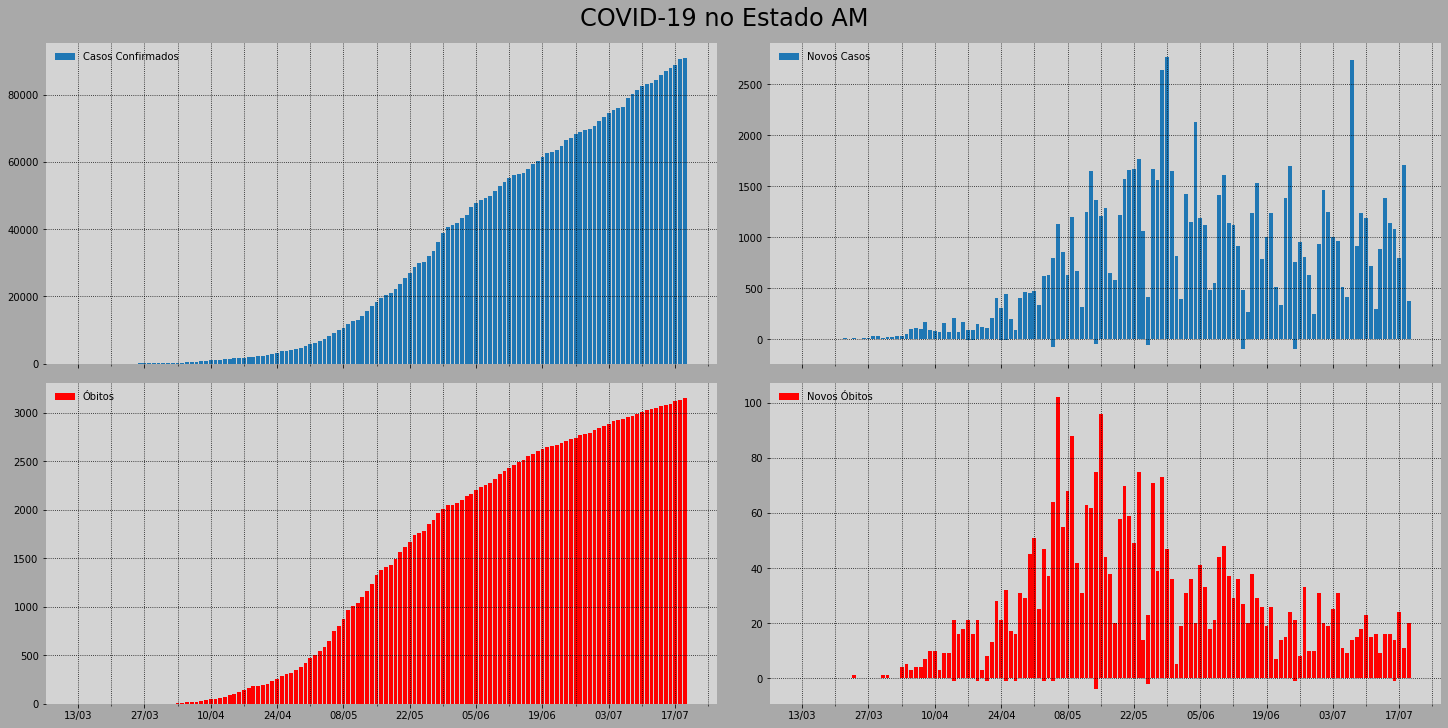

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20,10), facecolor='darkgrey', constrained_layout=True, sharex=True)
fig.suptitle("COVID-19 no Estado "+estado, fontsize=24)
x = estado_df.index.strftime("%d/%m")
axs[0, 0].bar(x, estado_df.last_available_confirmed, label = 'Casos Confirmados')
axs[0, 1].bar(x, estado_df.new_confirmed, label = 'Novos Casos')
axs[1, 0].bar(x, estado_df.last_available_deaths, label = 'Óbitos', color='red')
axs[1, 1].bar(x, estado_df.new_deaths, label = 'Novos Óbitos', color = 'red')

for a1 in range(len(axs)):
  for a2 in range(len(axs[a1])):
    axs[a1, a2].legend(frameon=False, loc='upper left')
    axs[a1,a2].xaxis.set_major_locator(plt.MultipleLocator(14))
    axs[a1,a2].xaxis.set_minor_locator(plt.MultipleLocator(7))
    axs[a1,a2].grid(b=True, which='both', color='black', linestyle=':')
    axs[a1,a2].set_facecolor('lightgrey')
    axs[a1,a2].spines['right'].set_visible(False)
    axs[a1,a2].spines['top'].set_visible(False)
    axs[a1,a2].spines['left'].set_visible(False)
    axs[a1,a2].spines['bottom'].set_visible(False)

## Panorama Brasileiro

In [ ]:
brasil_df = df.copy()
last_available = brasil_df.groupby('date').last_available_confirmed.sum()
date_index = last_available.index

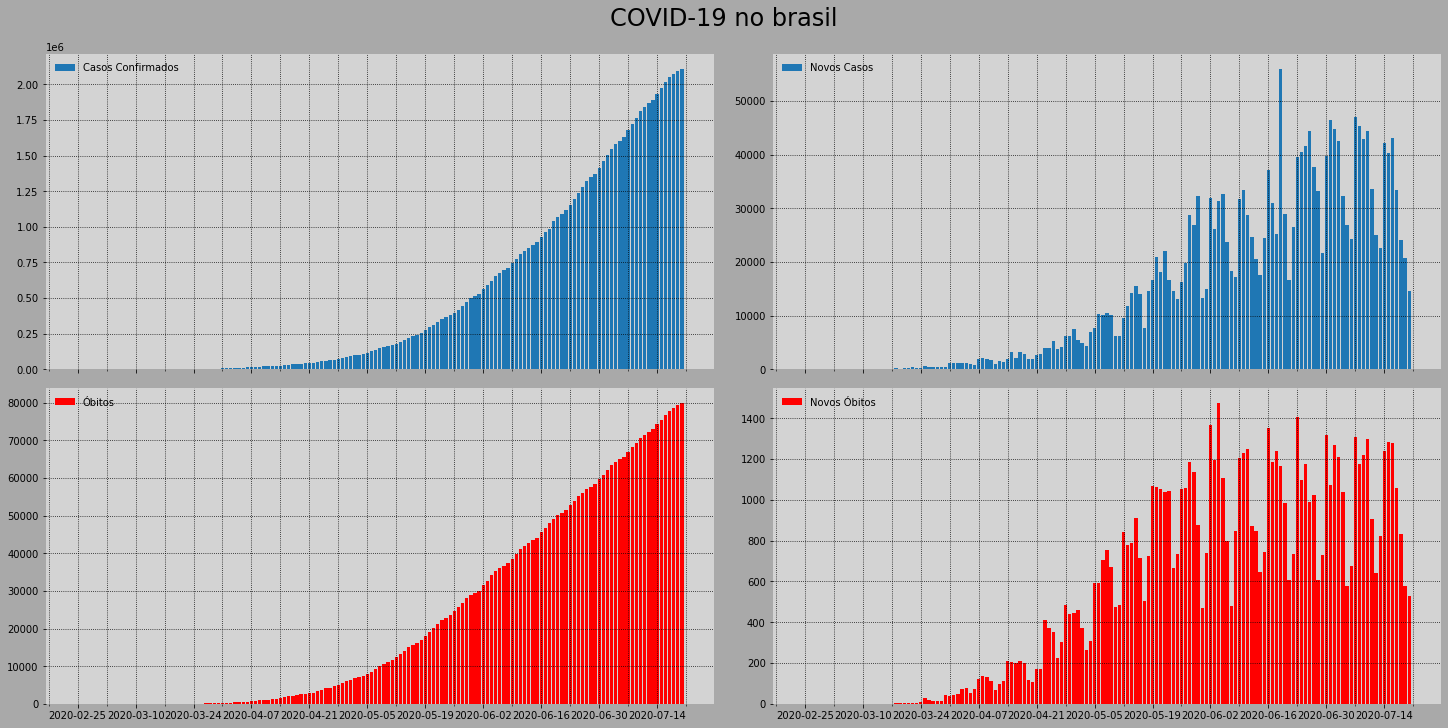

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20,10), facecolor='darkgrey', constrained_layout=True, sharex=True)
fig.suptitle("COVID-19 no Brasil", fontsize=24)
axs[0, 0].bar(date_index, brasil_df.groupby('date').last_available_confirmed.sum().divide(other = 2) , label = 'Casos Confirmados')
axs[0, 1].bar(date_index, brasil_df.groupby('date').new_confirmed.sum().divide(other = 2) , label = 'Novos Casos')
axs[1, 0].bar(date_index, brasil_df.groupby('date').last_available_deaths.sum().divide(other = 2) , label = 'Óbitos', color='red')
axs[1, 1].bar(date_index, brasil_df.groupby('date').new_deaths.sum().divide(other = 2) , label = 'Novos Óbitos', color = 'red')
# Usando o método .divide() pois o banco de dados é separado em dados municipais e estaduais. Ou seja, ao somar dados municipais e estaduais temos, diariamente, o dobro dos casos.
# Assim, dividindo por 2 retira tal redundância.
for a1 in range(len(axs)):
  for a2 in range(len(axs[a1])):
    axs[a1, a2].legend(frameon=False, loc='upper left')
    axs[a1,a2].xaxis.set_major_locator(plt.MultipleLocator(14))
    axs[a1,a2].xaxis.set_minor_locator(plt.MultipleLocator(7))
    axs[a1,a2].grid(b=True, which='both', color='black', linestyle=':')
    axs[a1,a2].set_facecolor('lightgrey')
    axs[a1,a2].spines['right'].set_visible(False)
    axs[a1,a2].spines['top'].set_visible(False)
    axs[a1,a2].spines['left'].set_visible(False)
    axs[a1,a2].spines['bottom'].set_visible(False)


# 2) Cidades com Mais Infectadas 


## Selecionando informações das Cidades 

In [ ]:
brasil_df.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0,0,3,city,SP,0,0


In [ ]:
# Transformação 
brasil_df['date'] = pd.to_datetime(brasil_df.date)

In [ ]:
# Data da última atualização do banco de dados
last_date_available = brasil_df.date.max()


In [ ]:
# Casos da última atualização
new_cases_df = brasil_df[brasil_df.date == last_date_available]
new_cases_df.head()

In [ ]:
# Nome das cidades que tem mais novos casos por 100k habitantes
id_cities_most_new_cases_per100k = new_cases_df.groupby('city_ibge_code').last_available_confirmed_per_100k_inhabitants.max().sort_values(ascending=False).index[:4]
id_cities_most_new_cases_per100k


Float64Index([1503754.0, 1600154.0, 1302108.0, 4312807.0], dtype='float64', name='city_ibge_code')

In [ ]:
# Informações das 4 cidades com maiores núimero de casos novos 
# por 100k habitantes

city_top1_df = brasil_df[(brasil_df.city_ibge_code == id_cities_most_new_cases_per100k[0]) ]
city_top2_df = brasil_df[(brasil_df.city_ibge_code == id_cities_most_new_cases_per100k[1]) ]
city_top3_df = brasil_df[(brasil_df.city_ibge_code == id_cities_most_new_cases_per100k[2]) ]
city_top4_df = brasil_df[(brasil_df.city_ibge_code == id_cities_most_new_cases_per100k[3]) ]

In [ ]:
city_top3_df.unique()




,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
68216,Japurá,1302108.0,2020-05-11,20,2755.0,False,False,7,254.08348,2020-05-11,0.0000,0,1,city,AM,7,0
71210,Japurá,1302108.0,2020-05-12,20,2755.0,False,False,8,290.38113,2020-05-12,0.0000,0,2,city,AM,1,0
74269,Japurá,1302108.0,2020-05-13,20,2755.0,False,False,8,290.38113,2020-05-13,0.0000,0,3,city,AM,0,0
77404,Japurá,1302108.0,2020-05-14,20,2755.0,False,False,10,362.97641,2020-05-14,0.0000,0,4,city,AM,2,0
80614,Japurá,1302108.0,2020-05-15,20,2755.0,False,False,10,362.97641,2020-05-15,0.0000,0,5,city,AM,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370594,Japurá,1302108.0,2020-07-16,29,2755.0,False,False,324,11760.43557,2020-07-16,0.0031,1,67,city,AM,4,0
376016,Japurá,1302108.0,2020-07-17,29,2755.0,False,False,327,11869.32849,2020-07-17,0.0031,1,68,city,AM,3,0
381441,Japurá,1302108.0,2020-07-18,29,2755.0,False,False,332,12050.81670,2020-07-18,0.0030,1,69,city,AM,5,0
386867,Japurá,1302108.0,2020-07-19,30,2755.0,False,False,332,12050.81670,2020-07-19,0.0030,1,70,city,AM,0,0


## Gráficos das TOP 4 cidades 

### Grafico 1


In [ ]:
city_top1_df.head()

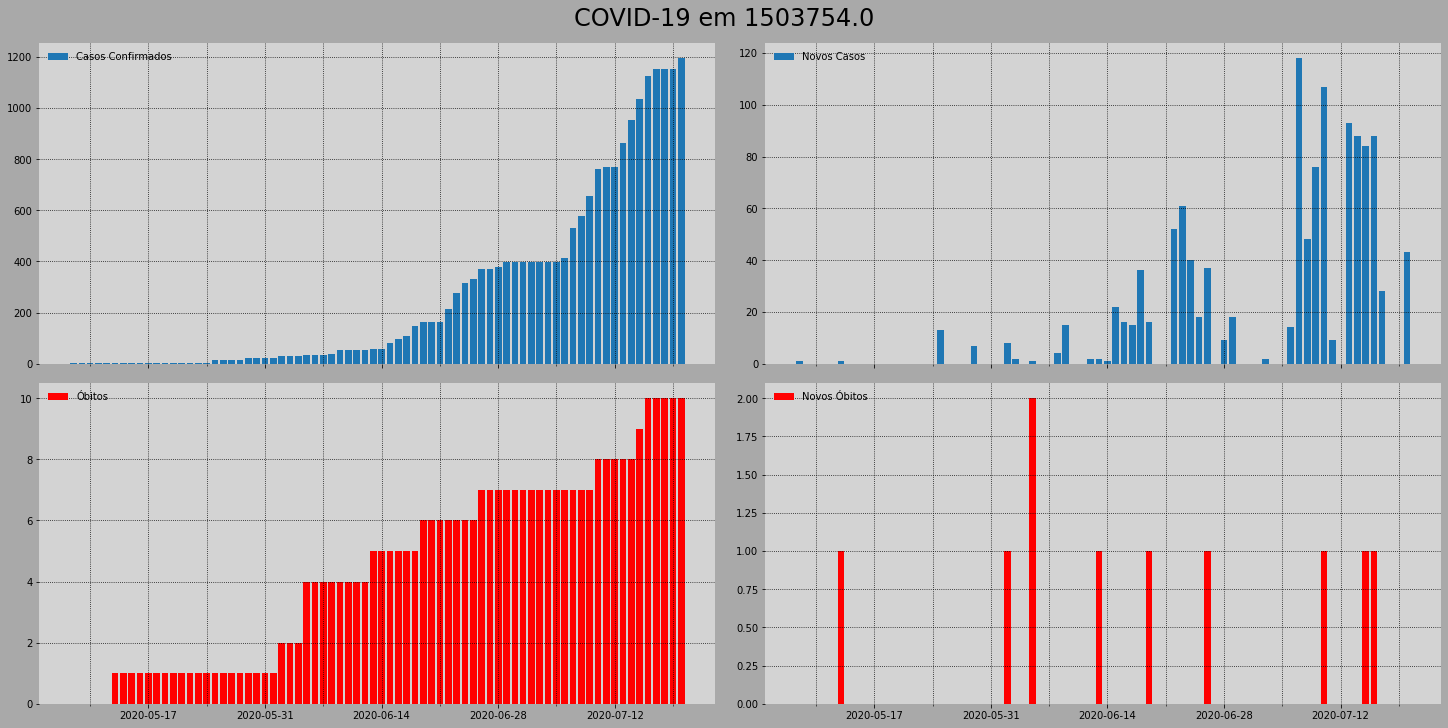

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20,10), facecolor='darkgrey', constrained_layout=True, sharex=True)
fig.suptitle("COVID-19 em "+str(id_cities_most_new_cases_per100k[0]), fontsize=24)
axs[0, 0].bar(city_top1_df.date, city_top1_df.last_available_confirmed, label = 'Casos Confirmados')
axs[0, 1].bar(city_top1_df.date, city_top1_df.new_confirmed, label = 'Novos Casos')
axs[1, 0].bar(city_top1_df.date, city_top1_df.last_available_deaths, label = 'Óbitos', color='red')
axs[1, 1].bar(city_top1_df.date, city_top1_df.new_deaths , label = 'Novos Óbitos', color = 'red')
# Usando o método .divide() pois o banco de dados é separado em dados municipais e estaduais. Ou seja, ao somar dados municipais e estaduais temos, diariamente, o dobro dos casos.
# Assim, dividindo por 2 retira tal redundância.
for a1 in range(len(axs)):
  for a2 in range(len(axs[a1])):
    axs[a1, a2].legend(frameon=False, loc='upper left')
    axs[a1,a2].xaxis.set_major_locator(plt.MultipleLocator(14))
    axs[a1,a2].xaxis.set_minor_locator(plt.MultipleLocator(7))
    axs[a1,a2].grid(b=True, which='both', color='black', linestyle=':')
    axs[a1,a2].set_facecolor('lightgrey')
    axs[a1,a2].spines['right'].set_visible(False)
    axs[a1,a2].spines['top'].set_visible(False)
    axs[a1,a2].spines['left'].set_visible(False)
    axs[a1,a2].spines['bottom'].set_visible(False)


### Gráfico 2

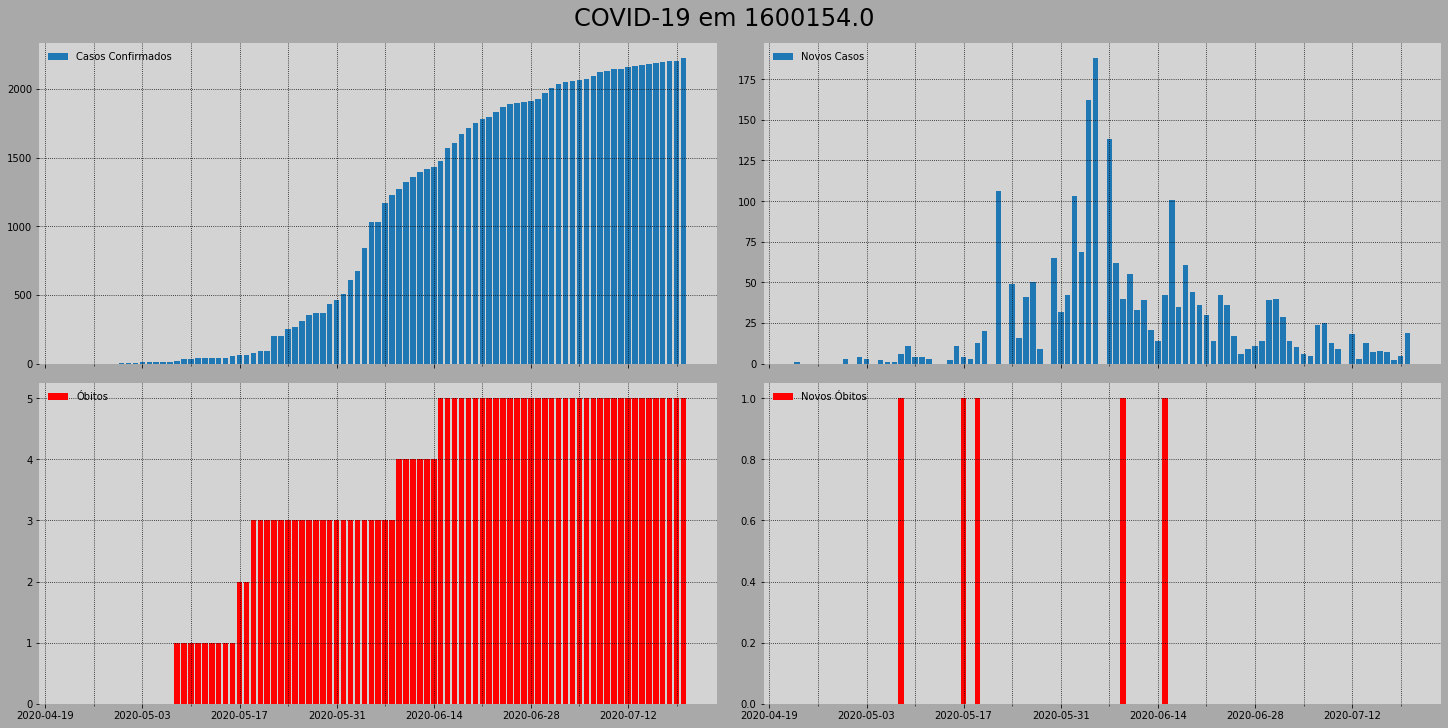

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20,10), facecolor='darkgrey', constrained_layout=True, sharex=True)
fig.suptitle("COVID-19 em "+str(id_cities_most_new_cases_per100k[1]), fontsize=24)
axs[0, 0].bar(city_top2_df.date, city_top2_df.last_available_confirmed, label = 'Casos Confirmados')
axs[0, 1].bar(city_top2_df.date, city_top2_df.new_confirmed, label = 'Novos Casos')
axs[1, 0].bar(city_top2_df.date, city_top2_df.last_available_deaths, label = 'Óbitos', color='red')
axs[1, 1].bar(city_top2_df.date, city_top2_df.new_deaths , label = 'Novos Óbitos', color = 'red')
# Usando o método .divide() pois o banco de dados é separado em dados municipais e estaduais. Ou seja, ao somar dados municipais e estaduais temos, diariamente, o dobro dos casos.
# Assim, dividindo por 2 retira tal redundância.
for a1 in range(len(axs)):
  for a2 in range(len(axs[a1])):
    axs[a1, a2].legend(frameon=False, loc='upper left')
    axs[a1,a2].xaxis.set_major_locator(plt.MultipleLocator(14))
    axs[a1,a2].xaxis.set_minor_locator(plt.MultipleLocator(7))
    axs[a1,a2].grid(b=True, which='both', color='black', linestyle=':')
    axs[a1,a2].set_facecolor('lightgrey')
    axs[a1,a2].spines['right'].set_visible(False)
    axs[a1,a2].spines['top'].set_visible(False)
    axs[a1,a2].spines['left'].set_visible(False)
    axs[a1,a2].spines['bottom'].set_visible(False)

### Gráfico 3

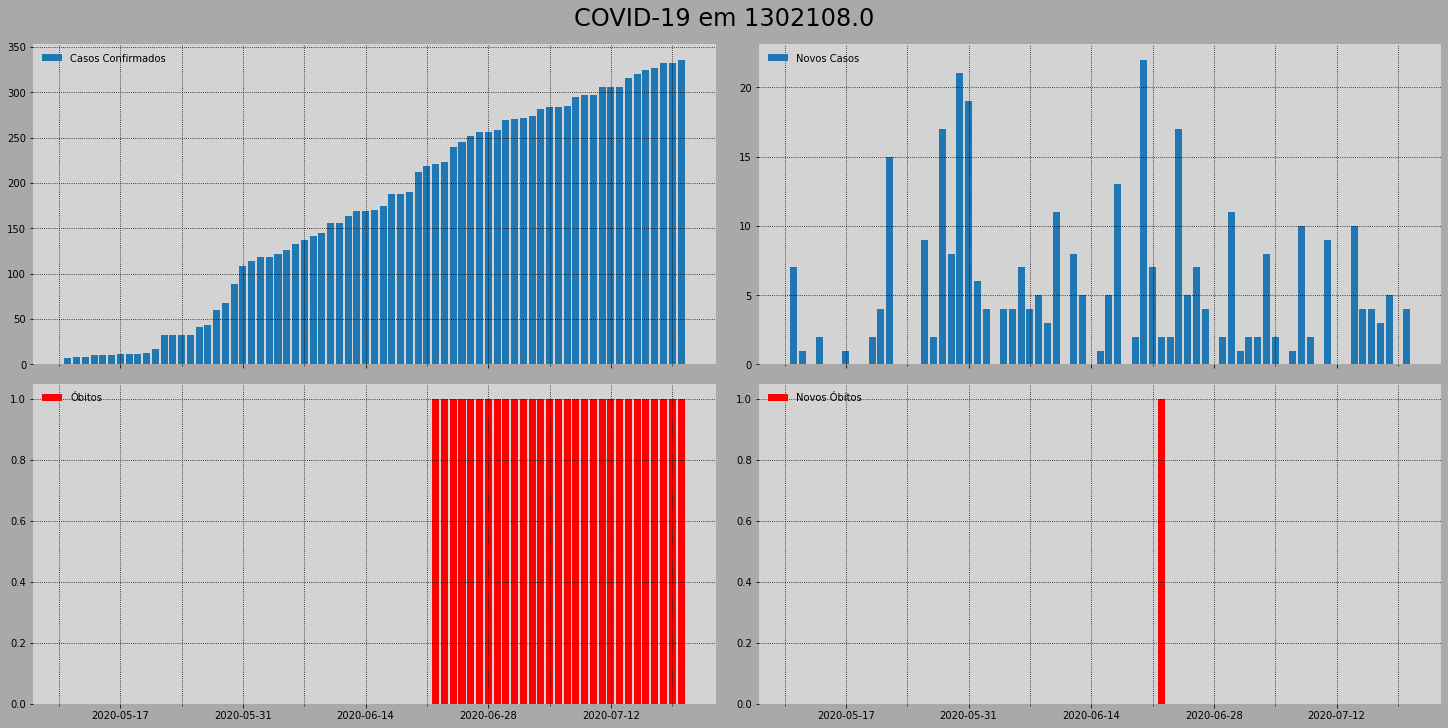

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20,10), facecolor='darkgrey', constrained_layout=True, sharex=True)
fig.suptitle("COVID-19 em "+str(id_cities_most_new_cases_per100k[2]), fontsize=24)
axs[0, 0].bar(city_top3_df.date, city_top3_df.last_available_confirmed, label = 'Casos Confirmados')
axs[0, 1].bar(city_top3_df.date, city_top3_df.new_confirmed, label = 'Novos Casos')
axs[1, 0].bar(city_top3_df.date, city_top3_df.last_available_deaths, label = 'Óbitos', color='red')
axs[1, 1].bar(city_top3_df.date, city_top3_df.new_deaths , label = 'Novos Óbitos', color = 'red')
# Usando o método .divide() pois o banco de dados é separado em dados municipais e estaduais. Ou seja, ao somar dados municipais e estaduais temos, diariamente, o dobro dos casos.
# Assim, dividindo por 2 retira tal redundância.
for a1 in range(len(axs)):
  for a2 in range(len(axs[a1])):
    axs[a1, a2].legend(frameon=False, loc='upper left')
    axs[a1,a2].xaxis.set_major_locator(plt.MultipleLocator(14))
    axs[a1,a2].xaxis.set_minor_locator(plt.MultipleLocator(7))
    axs[a1,a2].grid(b=True, which='both', color='black', linestyle=':')
    axs[a1,a2].set_facecolor('lightgrey')
    axs[a1,a2].spines['right'].set_visible(False)
    axs[a1,a2].spines['top'].set_visible(False)
    axs[a1,a2].spines['left'].set_visible(False)
    axs[a1,a2].spines['bottom'].set_visible(False)

### Gráfico 4 

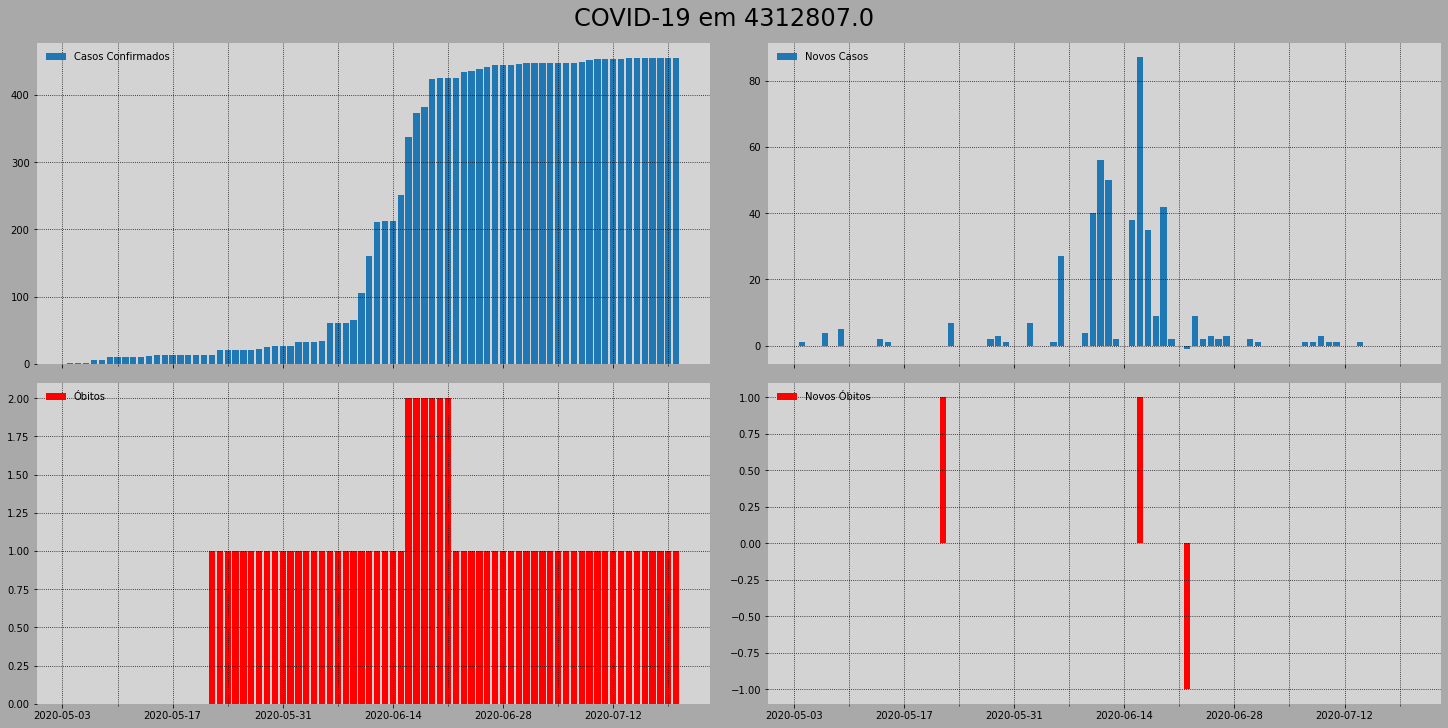

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20,10), facecolor='darkgrey', constrained_layout=True, sharex=True)
fig.suptitle("COVID-19 em "+str(id_cities_most_new_cases_per100k[3]), fontsize=24)
axs[0, 0].bar(city_top4_df.date, city_top4_df.last_available_confirmed, label = 'Casos Confirmados')
axs[0, 1].bar(city_top4_df.date, city_top4_df.new_confirmed, label = 'Novos Casos')
axs[1, 0].bar(city_top4_df.date, city_top4_df.last_available_deaths, label = 'Óbitos', color='red')
axs[1, 1].bar(city_top4_df.date, city_top4_df.new_deaths , label = 'Novos Óbitos', color = 'red')
# Usando o método .divide() pois o banco de dados é separado em dados municipais e estaduais. Ou seja, ao somar dados municipais e estaduais temos, diariamente, o dobro dos casos.
# Assim, dividindo por 2 retira tal redundância.
for a1 in range(len(axs)):
  for a2 in range(len(axs[a1])):
    axs[a1, a2].legend(frameon=False, loc='upper left')
    axs[a1,a2].xaxis.set_major_locator(plt.MultipleLocator(14))
    axs[a1,a2].xaxis.set_minor_locator(plt.MultipleLocator(7))
    axs[a1,a2].grid(b=True, which='both', color='black', linestyle=':')
    axs[a1,a2].set_facecolor('lightgrey')
    axs[a1,a2].spines['right'].set_visible(False)
    axs[a1,a2].spines['top'].set_visible(False)
    axs[a1,a2].spines['left'].set_visible(False)
    axs[a1,a2].spines['bottom'].set_visible(False)